This was a bit of a scratch work file: we used it to see if there was any information we could visualize about breeds, and a
little bit of number collection for the other categorical columns of note. The graph is visible, and we tried a couple of different outputs 
(stacked bar, side by side bar, etc), but we couldn't see a pattern readily available. This was used after we saw that the small, medium, big dog sizes wasn't giving us much information.

<Figure size 1512x1008 with 0 Axes>

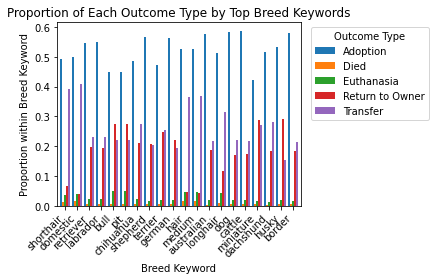

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Assume `sample_df` is already defined in the notebook environment
# and contains 'Breed' and 'Outcome Type'.

# 1. Extract relevant columns
df_vis = df_full[['Breed', 'Outcome Type']].dropna().copy()

# 2. Extract lowercase keyword tokens
df_vis['keywords'] = df_vis['Breed'].str.lower().apply(lambda x: re.findall(r"[a-z]+", x))

# 3. Explode keywords into separate rows
df_k = df_vis.explode('keywords')

# 4. Remove the generic 'mix' token
df_k = df_k[df_k['keywords'] != 'mix']

# 5. Crosstab: counts of each keyword by outcome
counts = pd.crosstab(df_k['keywords'], df_k['Outcome Type'])

# 6. Select top 20 keywords by overall frequency
top_kws = counts.sum(axis=1).nlargest(20).index
counts_top = counts.loc[top_kws]

# 7. Convert counts to proportions by row
props = counts_top.div(counts_top.sum(axis=1), axis=0)

# 8. Plot grouped bar chart for proportions
plt.figure(figsize=(21, 14))
ax = props.plot(kind='bar', width=0.8)
ax.set_ylabel('Proportion within Breed Keyword')
ax.set_xlabel('Breed Keyword')
ax.set_title('Proportion of Each Outcome Type by Top Breed Keywords')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Outcome Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your data
df = pd.read_csv('train.csv')   # ← change this to your file path

# 2. Get raw counts and relative frequencies
counts = df['Outcome Type'].value_counts()
freqs  = df['Outcome Type'].value_counts(normalize=True)  # fraction of total

counts = df['Breed'].unique()
print("breed counts", counts)


counts = df['Color'].unique()
print("color counts", counts)

print("Counts:\n", counts, "\n")
print("Percentages:\n", (freqs * 100).round(2), "%\n")

# # 3. Bar chart of counts
# plt.figure()
# counts.plot(kind='bar')
# plt.title('Distribution of Outcome Type')
# plt.xlabel('Outcome Type')
# plt.ylabel('Count')
# plt.tight_layout()
# plt.show()


breed counts ['English Springer Spaniel' 'Basenji Mix' 'Domestic Shorthair' ...
 'Swedish Vallhund/Siberian Husky' 'American Pit Bull Terrier/Boxer'
 'Labrador Retriever/Akbash']
color counts ['White/Liver' 'Sable/White' 'Orange Tabby' 'Chocolate' 'Black'
 'Brown Tabby' 'Black/White' 'Cream Tabby' 'White/Tan' 'Tricolor'
 'Brown Tabby/White' 'Brown Brindle/White' 'Torbie' 'Calico' 'Tan/White'
 'Blue/White' 'White/Brown' 'Brown/Cream' 'White/Black' 'Blue' 'White'
 'Black/Red' 'Brown/White' 'Tan' 'Chocolate/Brown' 'Tortie' 'Black/Gray'
 'Brown Merle' 'White/Blue' 'Blue Tabby' 'Sable/Tan' 'White/Gray'
 'Black/Tricolor' 'Brown/Black' 'Black/Brown Brindle' 'Yellow'
 'White/Cream' 'Cream Tabby/White' 'Black/Tan' 'Black/Brown' 'Brown'
 'Gray' 'Orange Tabby/White' 'Gray Tabby' 'Brown Tiger/White'
 'White/Orange Tabby' 'Lynx Point' 'Brown Tabby/Black' 'Chocolate/White'
 'Tan/Black' 'Chocolate/Tan' 'White/Brown Tabby' 'Buff/White' 'Cream'
 'Tricolor/Brown' 'Fawn/White' 'Blue Point' 'Red/White' 'R